## California House Price Prediction

This project predicts median house prices in California using machine learning.  
We’ll explore the dataset, train a model, and build an interactive web app using Streamlit.

### Objectives
- Perform Exploratory Data Analysis (EDA) to understand key features
- Train a regression model to predict house prices
- Build a simple and interactive Streamlit web app
- Prepare the project for deployment

## importing libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## 🏠 Problem Description

This project involves a **regression problem** using **supervised machine learning** techniques to predict house prices in an urban setting — specifically in **Paris**.

In regression problems, the goal is to predict a **continuous numeric value**. In our case, the objective is to estimate the **price of a house** based on various features such as size, number of rooms, amenities, and neighborhood attributes.

### 🔢 Given:

**Independent Variables (Features):**
- `squareMeters` — Total area of the house  
- `numberOfRooms` — Number of rooms in the house  
- `hasYard` — Whether the house has a yard (0 or 1)  
- `hasPool` — Whether the house has a pool (0 or 1)  
- `floors` — Number of floors  
- `cityCode` — Zip code of the house location  
- `cityPartRange` — Neighborhood exclusivity range (higher = more exclusive)  
- `numPrevOwners` — Number of previous owners  
- `made` — Year the house was built  
- `isNewBuilt` — Whether the house is newly built (0 or 1)  
- `hasStormProtector` — Presence of storm protection (0 or 1)  
- `basement` — Basement area in square meters  
- `attic` — Attic area in square meters  
- `garage` — Garage size  
- `hasStorageRoom` — Whether the house has a storage room (0 or 1)  
- `hasGuestRoom` — Number of guest rooms  

**Dependent Variable (Target):**
- `price` — The predicted **price of the house** (assumed to be in **Euros (€)**)

### 🎯 Goal

To build a machine learning model that can **accurately predict house prices** based on the combined effects of structural, locational, and amenity-related features.


## Load dataset

In [48]:
# Load the dataset
df = pd.read_csv('ParisHousing.csv')
df.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0             7  7559081.5  
1      3653   2436     128               1             2  8085989.5  
2      2937   8852     135               1             9  5574642.1  
3       659   7141     359               0             3  3232561.2  
4      8435   2429     292               1             4  7055052.0

### Understanding the Data

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [50]:
df.columns


Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [51]:
df.shape

(10000, 17)

In [52]:
df.describe()

squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

           cityCode  cityPartRange  numPrevOwners         made    isNewBuilt  \
count  10000.000000   10000.000000   10000.000000  10000.00000  10000.000000   
mean   50225.486100       5.510100       5.521700   2005.48850      0.499100   
std    29006.675799       2.872024       2.856667      9.30809      0.500024   
min        3.000000       1.000000       1.000000   1990.00000      0.000000   
25%    24693.750000       3.000000       3.000000   1997.00000      0.000000   
50%    50693.000000       5.000000       5.000000   2005.50000      0.000000   
75%    75683.250000       8.000000       8.000000   2014.00000      1.000000   
max    99953.000000      10.000000      10.000000   2021.00000      1.000000   

       hasStormProtector      basement        attic       garage  \
count       10000.000000  10000.000000  10000.00000  10000.00000   
mean            0.499900   5033.103900   5028.01060    553.12120   
std             0.500025   2876.729545   2894.33221    262.05017   
min             0.000000      0.000000      1.00000    100.00000   
25%             0.000000   2559.750000   2512.00000    327.75000   
50%             0.000000   5092.500000   5045.00000    554.00000   
75%             1.000000   7511.250000   7540.50000    777.25000   
max             1.000000  10000.000000  10000.00000   1000.00000   

       hasStorageRoom  hasGuestRoom         price  
count    10000.000000   10000.00000  1.000000e+04  
mean         0.503000       4.99460  4.993448e+06  
std          0.500016       3.17641  2.877424e+06  
min          0.000000       0.00000  1.031350e+04  
25%          0.000000       2.00000  2.516402e+06  
50%          1.000000       5.00000  5.016180e+06  
75%          1.000000       8.00000  7.469092e+06  
max          1.000000      10.00000  1.000677e+07

### Data Cleaning

In [53]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

### check for duplicate

In [54]:
df.duplicated().sum()

np.int64(0)

<center><h2> EDA </h2></center>

### Define the numerical and categorical features

In [55]:
categorical_cols = ['hasYard', 'hasPool', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom']
numerical_cols = ['squareMeters', 'numberOfRooms', 'floors', 'cityPartRange', 'numPrevOwners', 'basement', 'attic', 'garage', 'price']

## made and citycode not included here


## Univariate analysis

## Plot countplot for each categorical feature

A countplot is a type of bar plot that shows the counts of observations in each categorical bin using bars. It is important because it helps us quickly visualize the distribution and frequency of categories in the dataset. This can reveal class imbalances, data quality issues, or dominant categories that might influence the model.

Below, we plot countplots for key categorical variables in the Titanic dataset to understand their distributions.

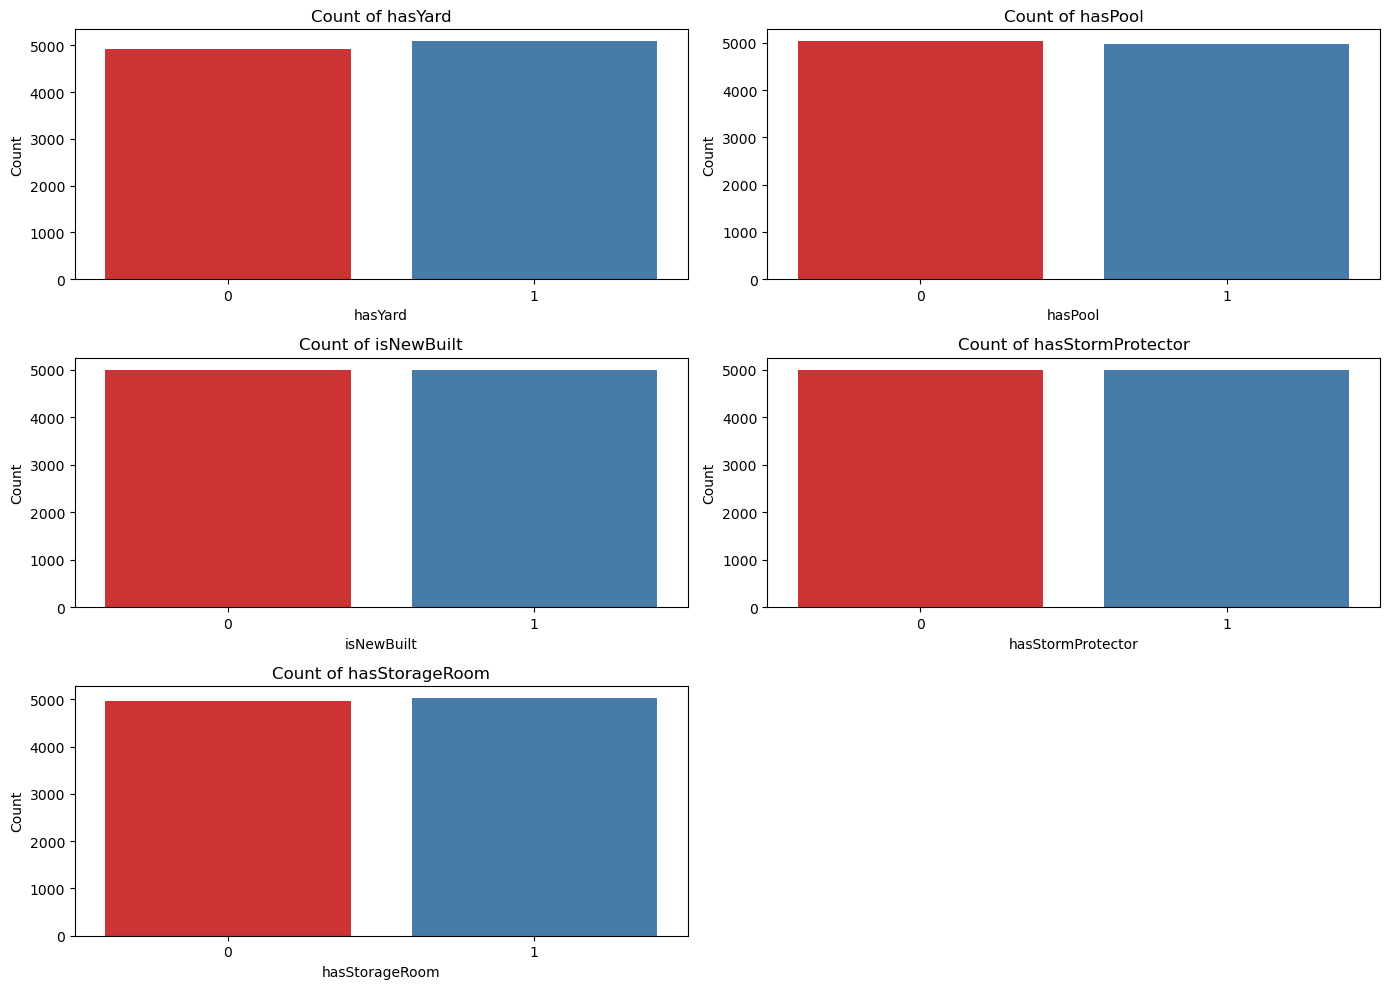

In [56]:
# Plot categorical features counts
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=df[col], palette='Set1')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Plot histograms for each numerical feature

A histogram is a graphical representation that organizes a group of data points into user-specified ranges (bins). It is important because it helps us understand the distribution, central tendency, spread, and presence of outliers in numerical data. This insight is crucial for selecting appropriate data preprocessing and modeling techniques.

Below, we plot histograms for key numerical variables in the Titanic dataset to visualize their distributions.

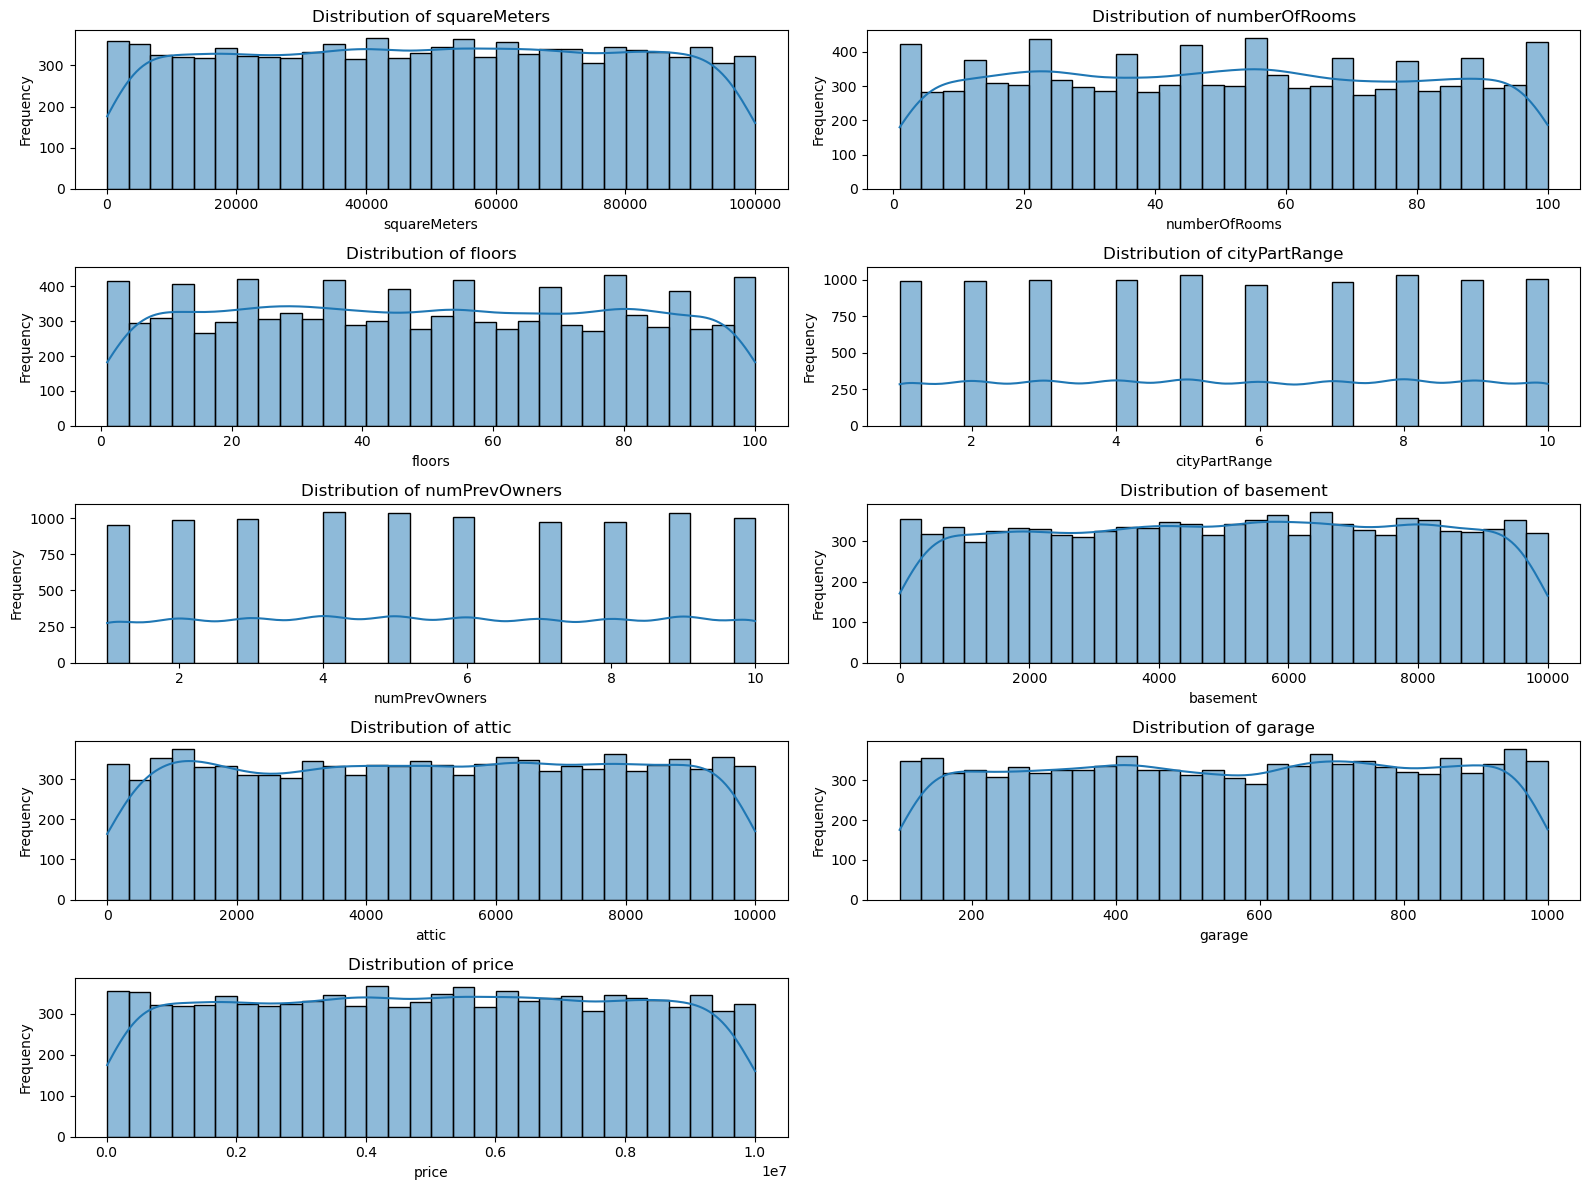

In [57]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 2, i)  # 5 rows, 2 columns (enough for 9 plots)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Boxplots for Numerical Features

A boxplot (or box-and-whisker plot) is a standardized way of displaying the distribution of numerical data based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It also highlights potential outliers.

Boxplots are useful to:

Understand the spread and skewness of the data,
Identify outliers,
Below, we visualize boxplots for numerical features such as Age and Fare in the Titanic dataset to gain insights into their distributions and variability.

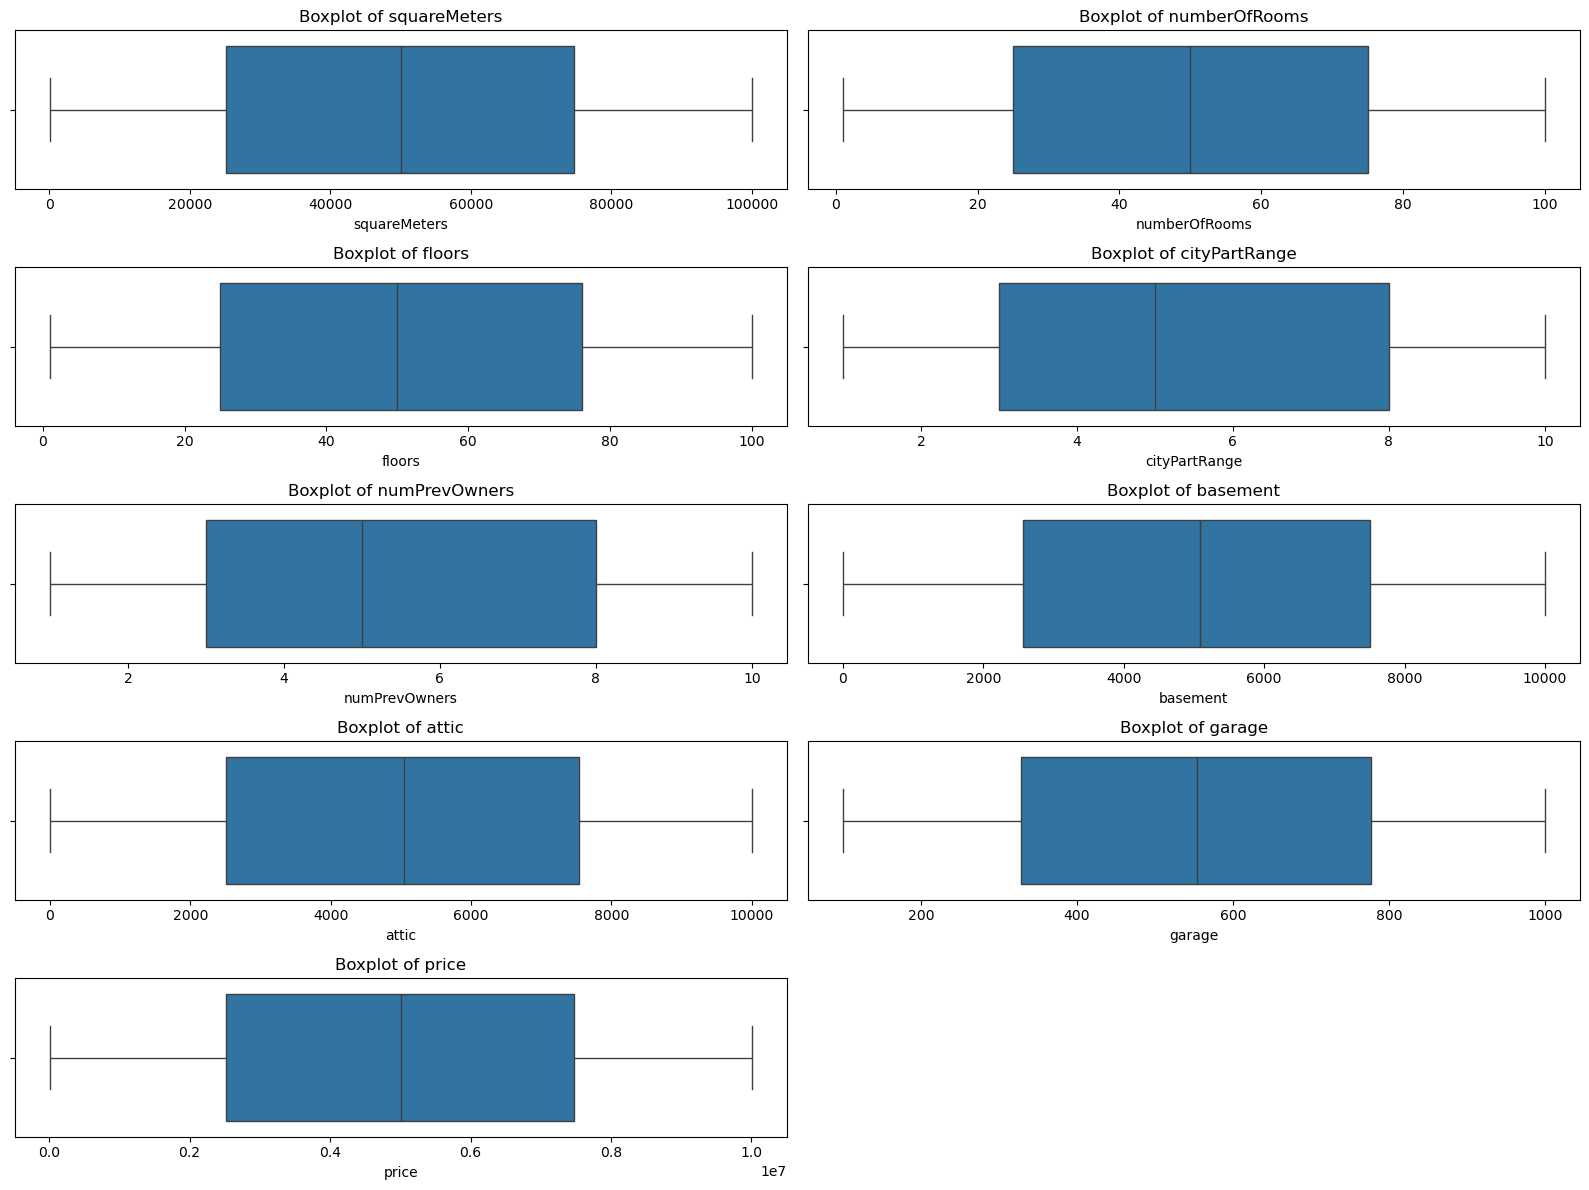

In [58]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## Bivariate analysis

### Scatter plots of each numerical feature vs price (except price itself)

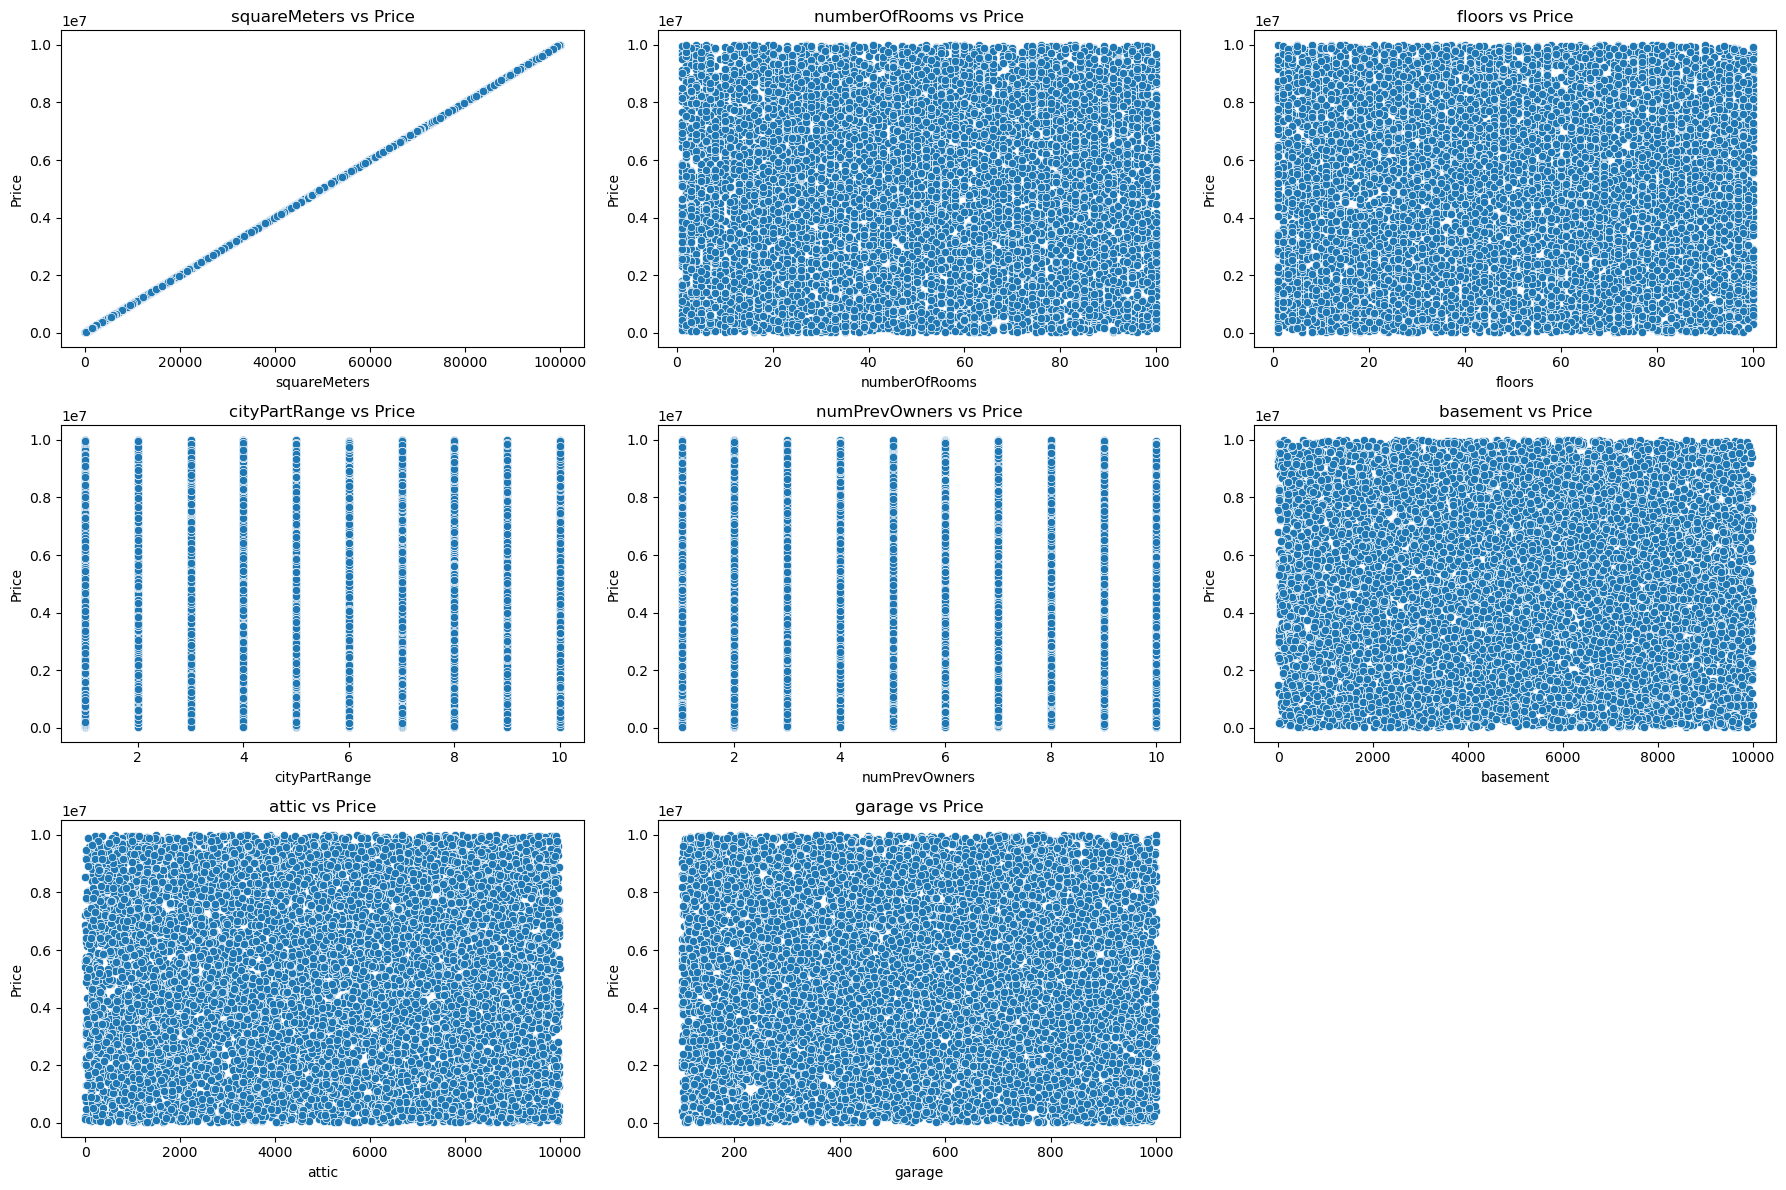

In [59]:
# Scatter plots of each numerical feature vs price (except price itself)
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols[:-1], 1):  # skip 'price' in x axis
    plt.subplot(3, 3, i)
    sns.scatterplot(x=col, y='price', data=df)
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

### Boxplots for price grouped by categorical/binary variables

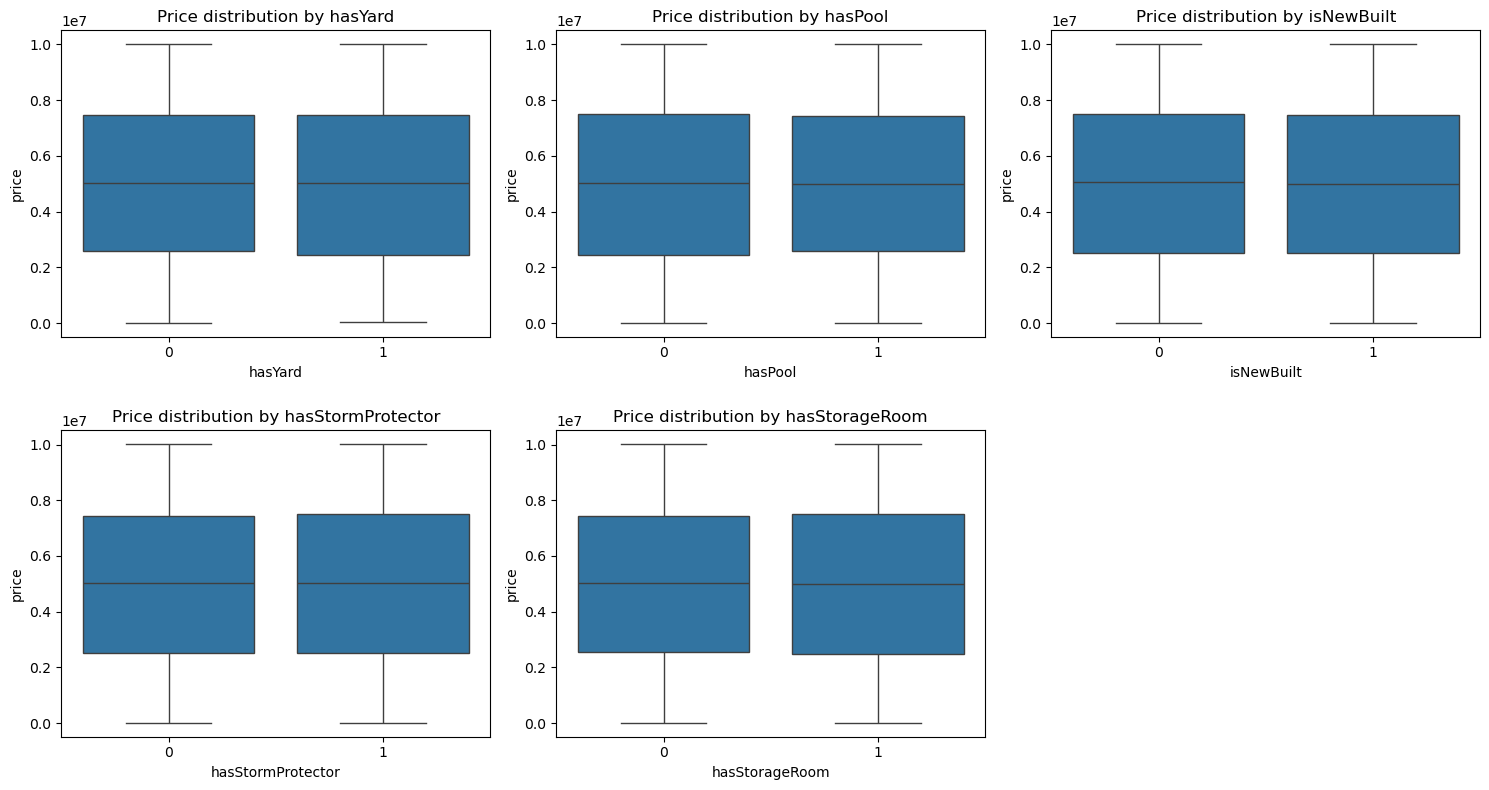

In [60]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price distribution by {col}')
plt.tight_layout()
plt.show()

## Multivariate analysis

### Scatter plot of squareMeters vs price colored by hasPool

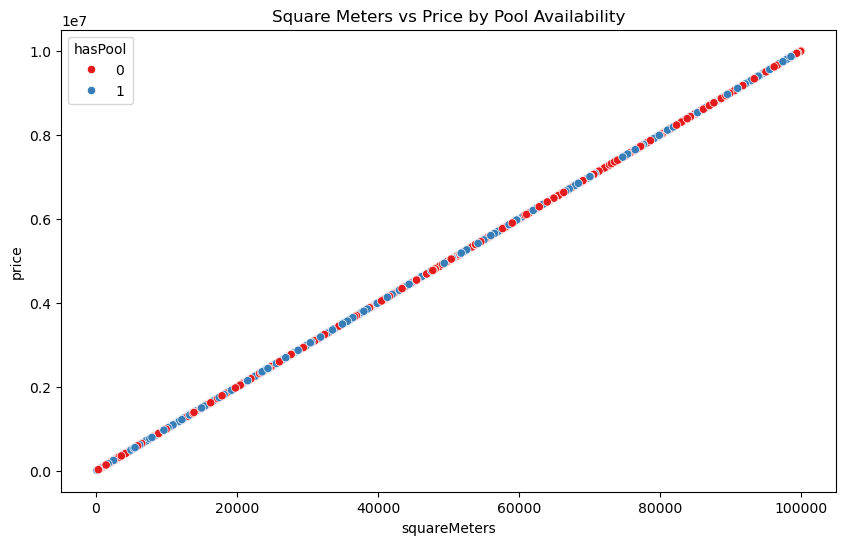

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='squareMeters', y='price', hue='hasPool', data=df, palette='Set1')
plt.title('Square Meters vs Price by Pool Availability')
plt.show()

### Scatter plot of numberOfRooms vs price colored by isNewBuilt

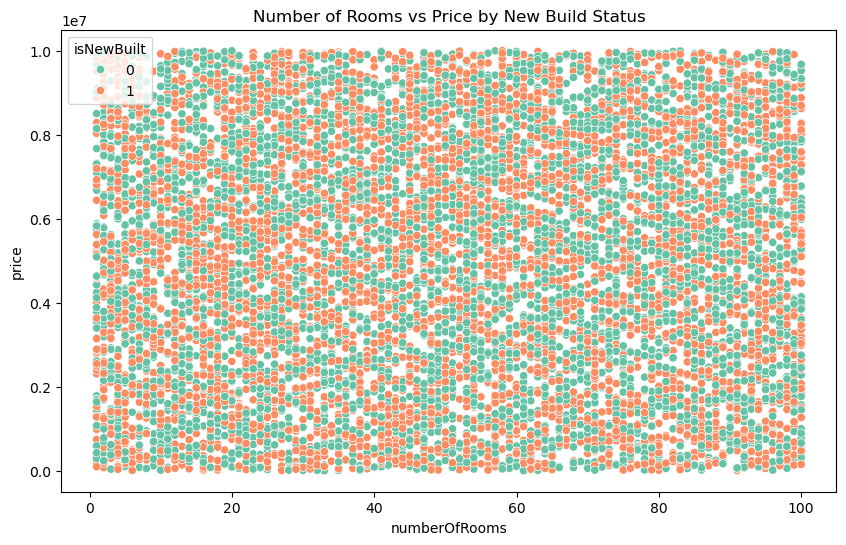

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='numberOfRooms', y='price', hue='isNewBuilt', data=df, palette='Set2')
plt.title('Number of Rooms vs Price by New Build Status')
plt.show()

### Pairplot with hue (for categorical variable)

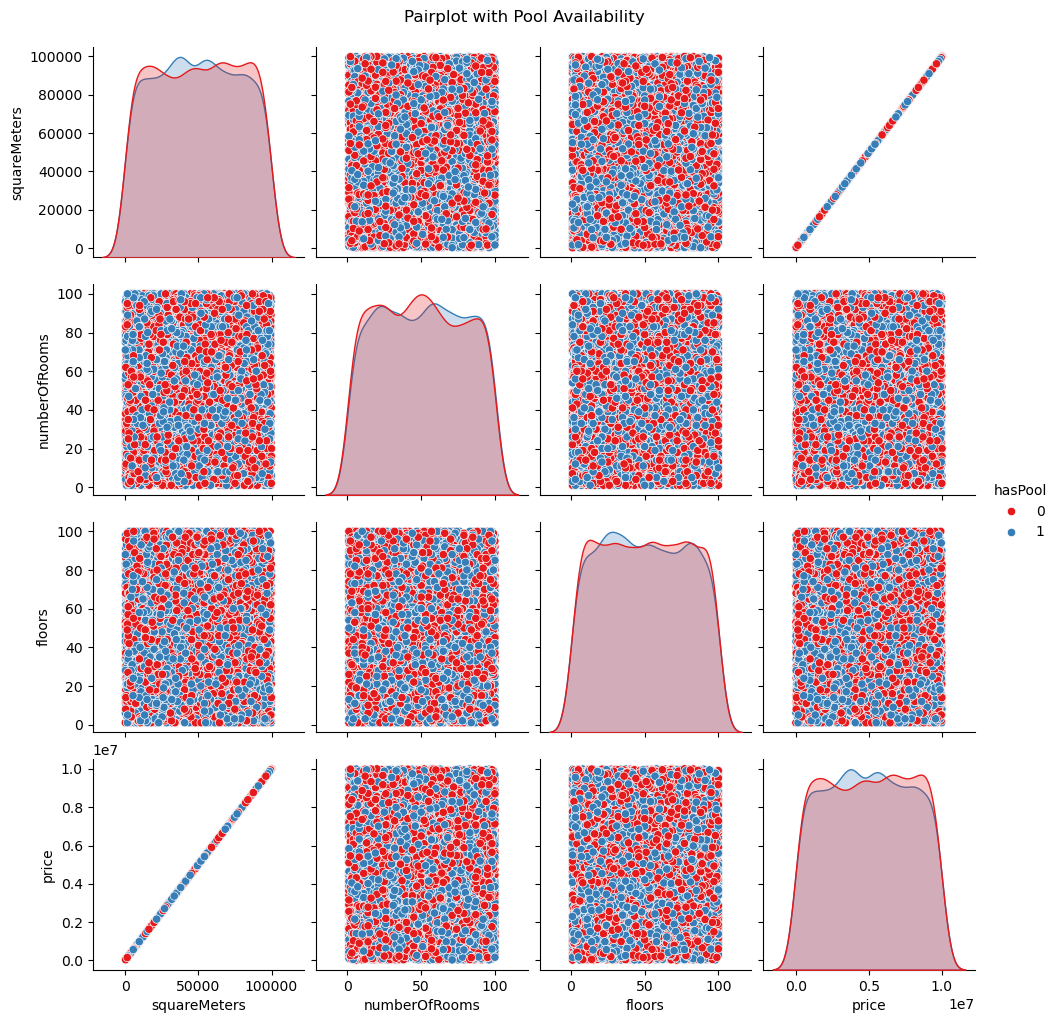

In [63]:

sns.pairplot(df, vars=['squareMeters', 'numberOfRooms', 'floors', 'price'], hue='hasPool', palette='Set1')
plt.suptitle('Pairplot with Pool Availability', y=1.02)
plt.show()

### Correlation matrix

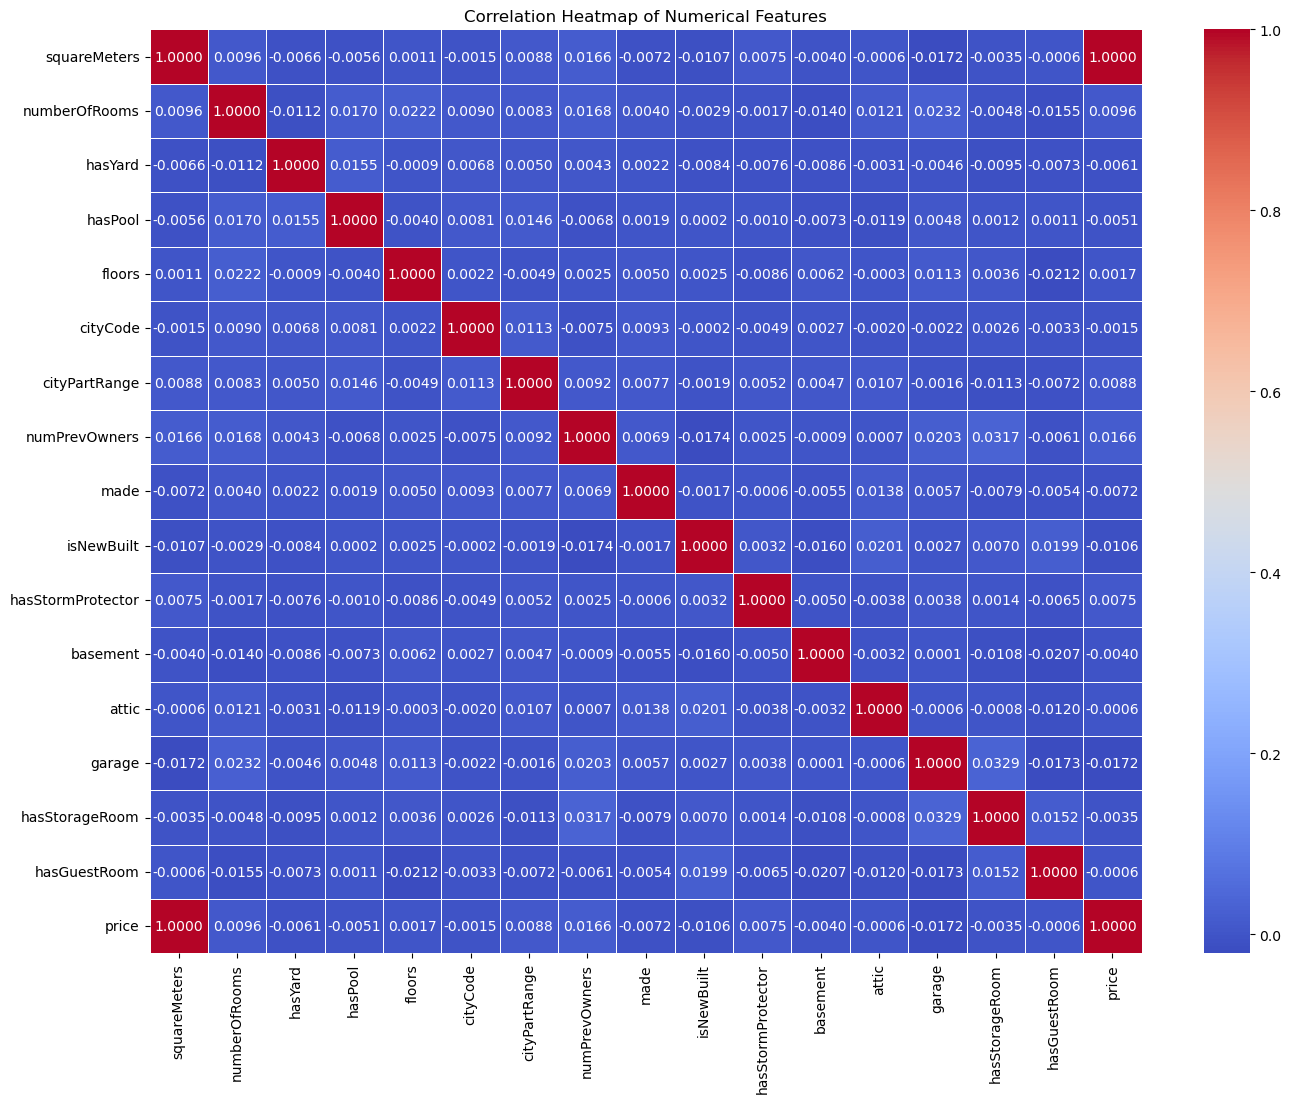

In [66]:
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Data splitting

In [67]:
from sklearn.model_selection import train_test_split

# Prepare data
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Check the shape of the splits
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Test set shape: {X_test.shape}, {y_test.shape}')

Training set shape: (8000, 16), (8000,)
Test set shape: (2000, 16), (2000,)


## Trying Different Machine Learning Models

To identify the best model for predicting house prices, multiple regression algorithms are tested. Each model is:

- Trained on the training dataset  
- Used to predict the test dataset  
- Evaluated based on performance metrics such as RMSE and R² score  

### Models Considered:
- Linear Regression  
- Decision Tree Regressor  
- Random Forest Regressor  
- XGBoost Regressor  


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                           RMSE        R2
Linear Regression   1922.422545  1.000000
Decision Tree       5704.065205  0.999996
Random Forest       3997.336048  0.999998
XGBoost            12347.723278  0.999983


### Model Selection

***Chosen Model:*** Linear Regression

***Reason:***  
Linear Regression was selected for this house price prediction task because it achieved the lowest RMSE (1922.42) and a perfect R2 score (1.0) on the test dataset. This indicates that the model explains the variance in house prices exceptionally well with minimal prediction error. Additionally, Linear Regression is a simple and interpretable model, making it easier to understand the relationship between features and the target variable.

While ensemble methods like Random Forest and XGBoost are often powerful, in this case, they resulted in higher RMSE values, suggesting that the simpler linear model fits the data adequately without overfitting.

Therefore, Linear Regression provides a good balance of accuracy, simplicity, and interpretability for this project.


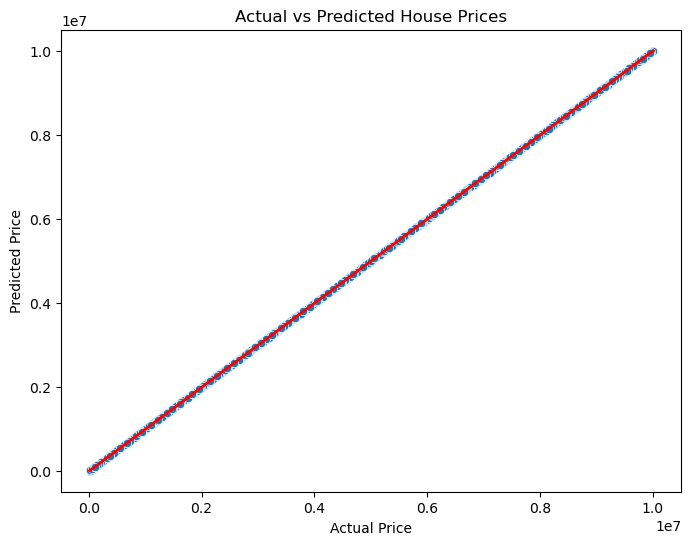

In [81]:
# Predict on test data using the chosen model (Linear Regression)
y_pred = models["Linear Regression"].predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()